In [188]:
import warnings; warnings.filterwarnings(action='ignore')
from matplotlib import pyplot as plt
%matplotlib inline
import geopandas as gpd
import pandas as pd
import dask_geopandas as dgpd

In [251]:
shapes = gpd.read_file("..\DSMW.shp")
shapes.head()

,SNUM,FAOSOIL,DOMSOI,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY,geometry
0,3479,Rx1-2c,Rx,NaN,NaN,0,0,1,85,GL,4194.0,GREENLAND,"POLYGON ((-34.67598 83.59787, -34.64999 83.593..."
1,6998,GL,GL,NaN,NaN,0,0,1,85,GL,8798.0,GREENLAND,"POLYGON ((-41.36428 82.79996, -41.32602 82.841..."
2,6998,GL,GL,NaN,NaN,0,0,1,85,GL,659.0,GREENLAND,"POLYGON ((-28.98742 83.50799, -28.97194 83.508..."
3,6998,GL,GL,NaN,NaN,0,0,1,85,GL,69.0,GREENLAND,"POLYGON ((-38.90607 83.29044, -39.03056 83.286..."
4,3479,Rx1-2c,Rx,NaN,NaN,0,0,1,85,GL,204.0,GREENLAND,"POLYGON ((-40.40554 83.33945, -40.42250 83.341..."


<Axes: >

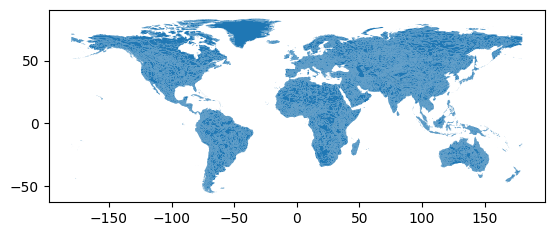

In [237]:
shapes.loc[:, 'geometry'].plot()

In [145]:
neighbors = shapes[~shapes.geometry.disjoint(shapes.iloc[0]['geometry'])]
neighbors

,GRID_ID,Continent,geometry
0,LI-202,8,"POLYGON ((-6574005.766 -1168083.871, -6588005...."
212,LH-203,8,"POLYGON ((-6574005.766 -1168083.871, -6588005...."
2086,LJ-202,8,"POLYGON ((-6504005.797 -1143835.170, -6532005...."
3155,LJ-203,8,"POLYGON ((-6504005.797 -1192332.572, -6532005...."
6740,LI-201,8,"POLYGON ((-6574005.766 -1071089.067, -6546005...."
7296,LH-202,8,"POLYGON ((-6588005.761 -1143835.170, -6616005...."
7649,LI-203,8,"POLYGON ((-6532005.784 -1192332.572, -6546005...."


<Axes: >

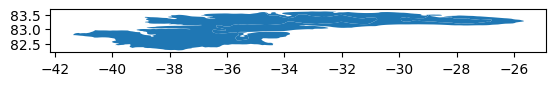

In [102]:
neighbors.loc[:, 'geometry'].plot()

In [103]:
soil_types = shapes["DOMSOI"].drop_duplicates(ignore_index = True)
for type in soil_types:
    if 'A' in type:
        print(type)
    if 'S' in type:
        print(type)

Sm
DS
So
Sg
S
Ah
Ao
ST
Ag
Af
Ap


<Axes: >

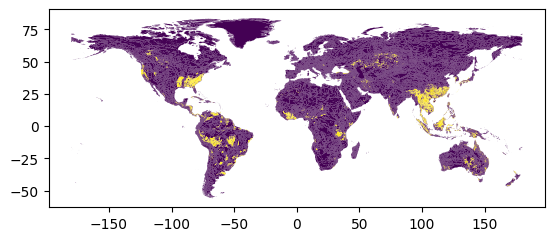

In [252]:
alluvial_soils = ["Ah", "Ao", "Ag", "Af", "Ap", "Sm", "So", "Sg", "S", "ST"]
shapes["alluvial"] = shapes["DOMSOI"].isin(alluvial_soils).apply(int)
shapes.cx[:, :].plot(column="alluvial")

In [241]:
shapes = gpd.read_file("..\DSMW.shp")
shapes_simu = gpd.read_file("..\World.shp")

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

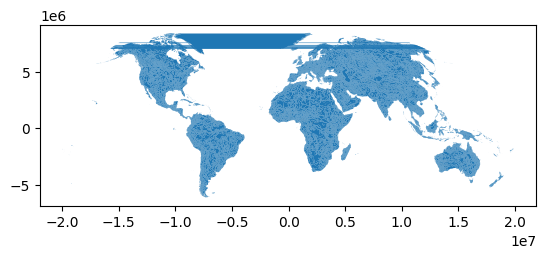

In [249]:
shapes.plot()

In [248]:
shapes.crs

<Projected CRS: ESRI:54052>
Name: World_Goode_Homolosine_Land
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Interrupted Goode Homolosine
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [243]:
shapes_simu.crs

<Projected CRS: ESRI:54052>
Name: World_Goode_Homolosine_Land
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Interrupted Goode Homolosine
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [254]:
shapes = shapes.to_crs(shapes_simu.crs)
shapes.crs

<Projected CRS: ESRI:54052>
Name: World_Goode_Homolosine_Land
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Interrupted Goode Homolosine
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

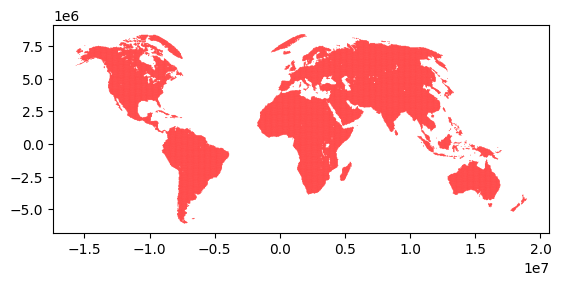

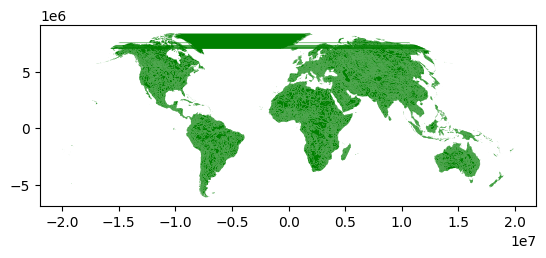

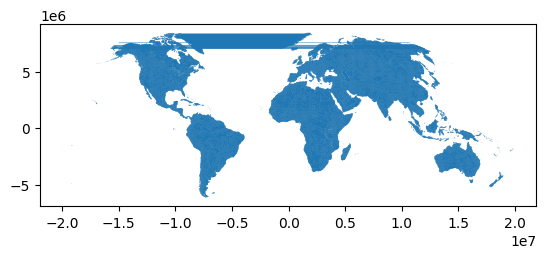

In [257]:
shapes_simu.plot(color="red")
shapes.plot(color="green")

pd.concat([shapes, shapes_simu]).plot()

In [277]:
def computeAlluviality(row):
    polygon = row.geometry
    clipped = gpd.clip(shapes, polygon).merge(shapes[["SNUM", "alluvial"]], on="SNUM").drop_duplicates()
    sum = clipped.SQKM.sum()
    allu = clipped[clipped.alluvial_x == 1].SQKM.sum()
    return allu/sum

computeAlluviality(shapes_simu.iloc[0])

0.0